In [0]:
import keras
from keras.datasets import fashion_mnist
from keras.utils import normalize, to_categorical
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Conv2D, Dropout, Activation
from keras.layers import MaxPooling2D, ZeroPadding2D, BatchNormalization
from keras.optimizers import Adam

import matplotlib.pyplot as plt


In [0]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

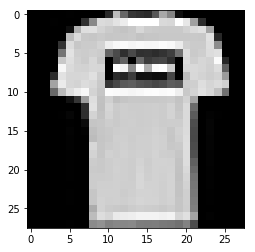

In [12]:
plt.imshow(X_train[1], cmap = plt.cm.gray)
plt.show()

In [13]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

#y_train = to_categorical(y_train, 10)
#y_test = to_categorical(y_test, 10)

X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

print(X_train.shape, y_train.shape)

(60000, 28, 28, 1) (60000,)


In [0]:
X_input = Input(X_train.shape[1:])
X = ZeroPadding2D((3,3))(X_input)

X = Conv2D(16,(3,3), padding='valid')(X)
X = BatchNormalization()(X)
X = Activation("relu")(X)
X = MaxPooling2D(2,2)(X)


X = Conv2D(64, (3,3), padding='valid')(X)
X = BatchNormalization()(X)
X = Activation("relu")(X)
X = MaxPooling2D(2,2)(X)

X = Conv2D(256, (3,3), padding='valid')(X)
X = BatchNormalization()(X)
X = Activation("relu")(X)
X = Dropout(0.3)(X)

X = Flatten()(X)
X = Dropout(0.3)(X)
X = Dense(32, activation='relu') (X)
X = Dropout(0.5)(X)

X = Dense(10, activation='softmax')(X)

model = Model(inputs=X_input, outputs=X, name='3-Conv-2step-1Dense')

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=Adam(lr=0.001, decay=0.0001),
             metrics=['accuracy'])

In [15]:
model.summary()

Model: "3-Conv-2step-1Dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 34, 34, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 16)        160       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)

In [16]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 24s 494us/step - loss: 0.9697 - acc: 0.6168 - val_loss: 0.4252 - val_acc: 0.8336
Epoch 2/50
48000/48000 [==============================] - 23s 475us/step - loss: 0.7321 - acc: 0.7099 - val_loss: 0.4006 - val_acc: 0.8542
Epoch 3/50
48000/48000 [==============================] - 22s 468us/step - loss: 0.6497 - acc: 0.7430 - val_loss: 0.3609 - val_acc: 0.8758
Epoch 4/50
48000/48000 [==============================] - 23s 471us/step - loss: 0.5973 - acc: 0.7695 - val_loss: 0.3129 - val_acc: 0.8904
Epoch 5/50
48000/48000 [==============================] - 23s 469us/step - loss: 0.5526 - acc: 0.7831 - val_loss: 0.2965 - val_acc: 0.8992
Epoch 6/50
48000/48000 [==============================] - 23s 469us/step - loss: 0.5353 - acc: 0.7919 - val_loss: 0.2798 - val_acc: 0.9019
Epoch 7/50
48000/48000 [==============================] - 23s 470us/step - loss: 0.5093 - acc: 0.8010 - val_loss: 0.

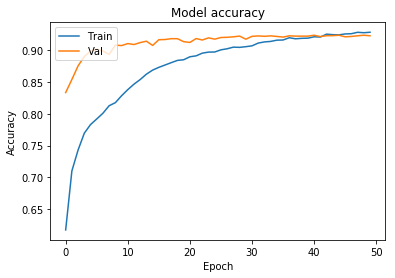

In [17]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()



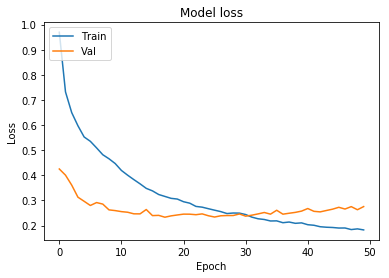

In [18]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [19]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 122us/step


[0.3118791766166687, 0.9172]

In [21]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
model.save("drive/My Drive/Colab Notebooks/fas-mnist-917.h5")